### Steps in Frequency domain filtering 

*image -> fft -> shift (0,0) to center -> create mask -> (mutiply mask with domain) -> inverse fft*
###### Convolution
* fold ...(we do not fold as mask is symmetric in spatial domain)
* multiply 
* add  
* shift

When the radius reduces the blurring becomes more as we accomodate less values in the mask circle radius.Ringing effect is removed by Butterworth filter (Conclusion)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import scipy.fft as transform 

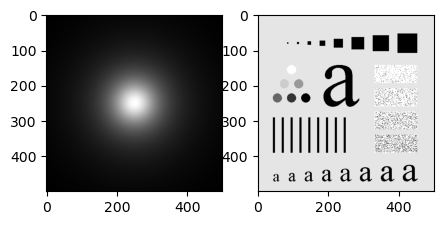

In [75]:
image = im.imread('task2.tif')
plt.imshow(image,cmap='gray')
plt.show();

In [76]:
image_freq_domain = transform.fft2(image)
# image_freq_domain

In [77]:
image_freq_domain = transform.fftshift(image_freq_domain)

In [78]:
n,m = image_freq_domain.shape

In [79]:
def mask(d0, m, n):
    lpf_filter = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            d1 = np.sqrt(pow((i-m//2), 2)+pow((j-n//2), 2))
            if d1 > d0:
                lpf_filter[i, j] = 0
            else:
                lpf_filter[i, j] = 1
    return lpf_filter

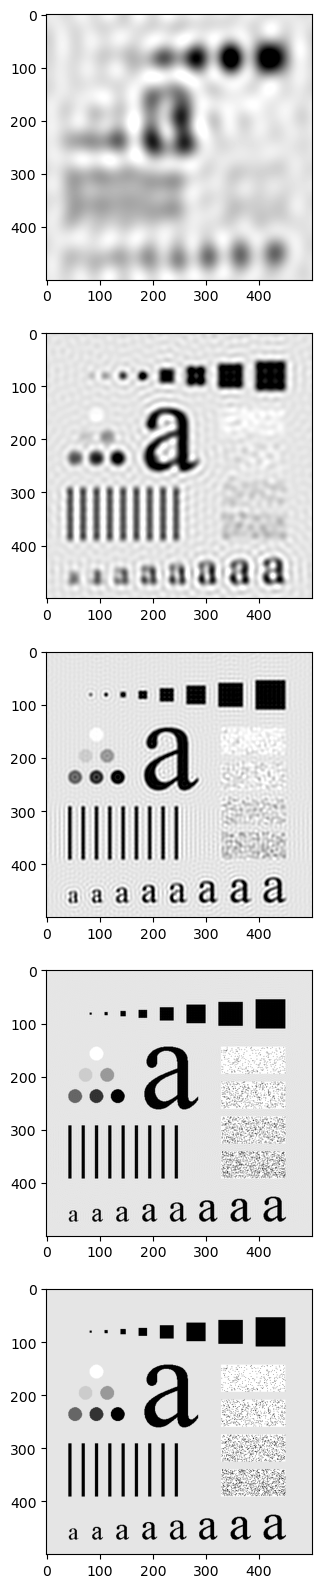

In [80]:
radii = [10,30,60,160,460]
plt.figure(figsize=(20,20))
for i in range(len(radii)):
    lpf_filter = mask(radii[i],m,n)
    image_lpf = image_freq_domain * lpf_filter
    image_lpf = transform.fftshift(image_lpf)
    real_part = np.real(transform.ifft2(image_lpf))
#     print(real_part)
    plt.subplot(5,1,i+1)
    plt.imshow(real_part,cmap='gray',vmin=0,vmax=255)
plt.show()

As radius of filter increases the blurring effect decreases. Thus there is an inverse relation between these two parameters.

In [81]:
def remove_ringing(d0, m, n, order):
    butterworth_filter = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            d1 = np.sqrt(pow((i-m//2), 2)+pow((j-n//2), 2))
            butterworth_filter[i, j] = (1 /(1 + (pow((d1/d0),(2*order))))) 
    return butterworth_filter

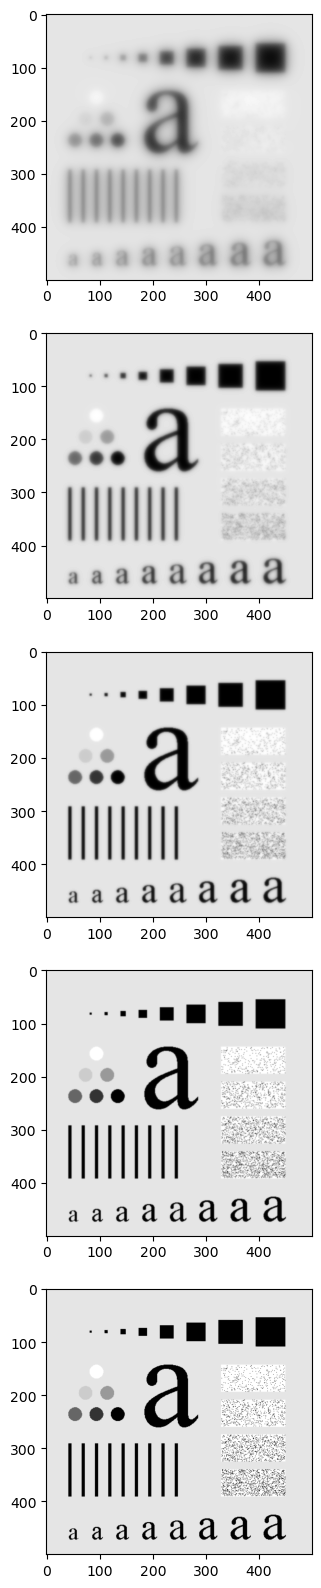

In [82]:
radii = [10,30,60,160,460]
plt.figure(figsize=(20,20))
for i in range(len(radii)):
    butterworth_filter = remove_ringing(radii[i],m,n,order=1)
    image = image_freq_domain * butterworth_filter
    image = transform.fftshift(image)
    real_part = np.real(transform.ifft2(image))
#     print(real_part)
    plt.subplot(5,1,i+1)
    plt.imshow(real_part,cmap='gray',vmax=255,vmin=0)
#     plt.imshow(butterworth_filter,cmap='gray')
plt.show()

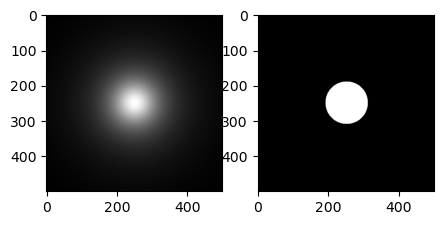

In [83]:
radii = 60
# for i in range(len(radii)):
butterworth_filter = remove_ringing(radii,m,n,order=1)
ideal_lpf = mask(radii,m,n)
fig, ax = plt.subplots(figsize=(5,5),ncols=2,nrows=1)
ax[0].imshow(butterworth_filter,cmap='gray')
ax[1].imshow(ideal_lpf,cmap='gray')
plt.show();

Thus at lower order of tfilter the butterworth filter acts like an ideal low pass filter without/removes the ringing effect